<a href="https://colab.research.google.com/github/Nomade25/Mackenzie/blob/main/TradeOff_e_Clusteriza%C3%A7%C3%A3o_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
mahalset = pd.read_csv('/content/sample_data/Mahaltrain.csv')

Tratamentos !!!


In [ ]:
# Para esse dataset temos a seguintes features
#Sexo
#Tipo de Cliente
#idade
#Tipo de viagem
#Classe
#distancia do voo
#serviço de wifi
#Tempo de embarque/desembarque
#facilidade de agendamento
#localização do portão
#serviço de comida
#internet
#conforto do acento
#entretenimento no voo
#serviço de bordo
#espaço das pernas
#bagageiro
#serviço checkin 
#serviço de voo
#limpeza
#Atraso no embarque
#atraso do desembarque

In [ ]:
mahalset.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# Valores nulo?
(mahalset.isnull().sum()).sort_values(ascending=False)

Arrival Delay in Minutes             310
satisfaction                           0
Gate location                          0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Unnamed: 0      

In [ ]:
# Dropando valores nulos
mahalset = mahalset.dropna()

In [ ]:
# dropar coluna irrelevantes

mahalset = mahalset.drop(['id','Unnamed: 0'],axis =1)



In [ ]:
# Quais colunas?
(mahalset.isnull().sum()).sort_values(ascending=False)

satisfaction                         0
Food and drink                       0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Online boarding                      0
Arrival Delay in Minutes             0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Gender                               0
dtype: int64

In [ ]:
# quais tIpos de dados
mahalset.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [ ]:
mahalset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Transformado valores categoricos em númericos para o modelo

sat_mapping = {"neutral or dissatisfied":0, "satisfied":1}
mahalset['satisfaction'] = mahalset['satisfaction'].map(sat_mapping)

sex_mapping = {"Male":0, "Female":1}
mahalset['Gender'] = mahalset['Gender'].map(sex_mapping)

ct_mapping = {"Loyal Customer":0, "disloyal Customer":1}
mahalset['Customer Type'] = mahalset['Customer Type'].map(ct_mapping)

tot_mapping = {"Personal Travel":0, "Business travel":1}
mahalset['Type of Travel'] = mahalset['Type of Travel'].map(tot_mapping)

class_mapping = {"Business":0, "Eco":1,"Eco Plus":2}
mahalset['Class'] = mahalset['Class'].map(class_mapping )



In [ ]:
# Agora percebemos que essas features entraram para o describe
mahalset.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.507520,0.182752,39.380466,0.689857,0.593944,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.433394
std,0.499946,0.386465,15.113125,0.462554,0.620771,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,40.000000,1.000000,1.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
#renomeando colunas
mahalset = mahalset.rename(columns={'Type of Travel':'TypeOfTravel','Inflight wifi service':'InflightWifiService'
,'Food and drink':'Foodanddrink','Customer Type':'CustomerType','Flight Distance':'FlightDistance','Ease of Online booking':'EaseofOnlinebooking'
,'Gate location':'GateLocation','Online boarding':'OnlineBoarding','Seat comfort':'SeatComfort','Inflight entertainment':'InflightEntertainment'
,'Inflight service':'Inflightservice','Departure Delay in Minutes':'DepartureDelayinMinutes','Arrival Delay in Minutes':'ArrivalDelayinMinutes'
})

Clusterização

In [ ]:
# Criando duas classes de clusterização, clientes satisfeitos e insatisfeitos

satisfeitos = mahalset[mahalset['satisfaction']==1]
insatisfeitos = mahalset[mahalset['satisfaction']==0]
satisfeitos = satisfeitos.drop(['satisfaction'], axis =1)
insatisfeitos = insatisfeitos.drop(['satisfaction'], axis =1)

Vamos começar rodar os primeiro modelos para indentificar o tradeoff

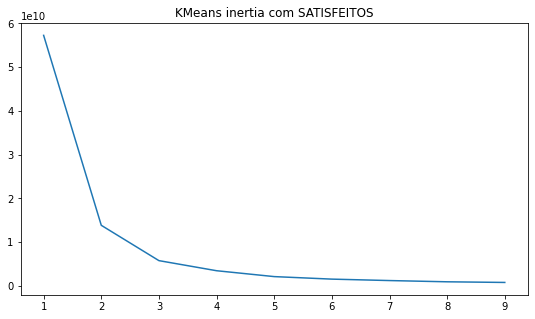

In [ ]:
# Começando com 10 clusters de safisfeitos
inertia =[]
for i in range (1, 10):
    km = KMeans (n_clusters=i).fit(satisfeitos)
    inertia.append(km.inertia_)

#plot results
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(1,10), y=inertia)
plt.title('KMeans inertia com SATISFEITOS')

plt.show()

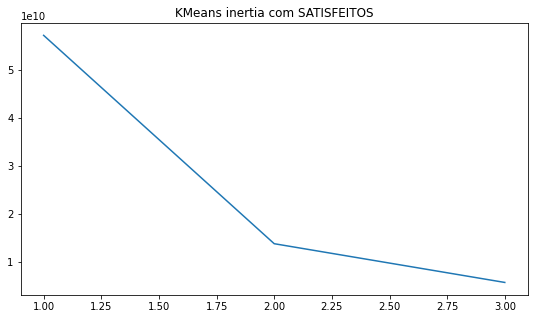

In [ ]:
# melhor valor localizado com corte de até 3 clusters
inertia =[]
for i in range (1, 4):
    km = KMeans (n_clusters=i).fit(satisfeitos)
    inertia.append(km.inertia_)

#plot results
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(1,4), y=inertia)
plt.title('KMeans inertia com SATISFEITOS')

plt.show()

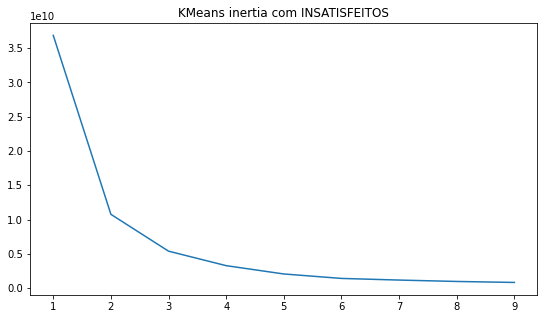

In [ ]:
# vamos rodar os insatisfeitos

# Começando com 10 clusters de insafisfeitos
inertia =[]
for i in range (1, 10):
    km = KMeans (n_clusters=i).fit(insatisfeitos)
    inertia.append(km.inertia_)

#plot results
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(1,10), y=inertia)
plt.title('KMeans inertia com INSATISFEITOS')

plt.show()

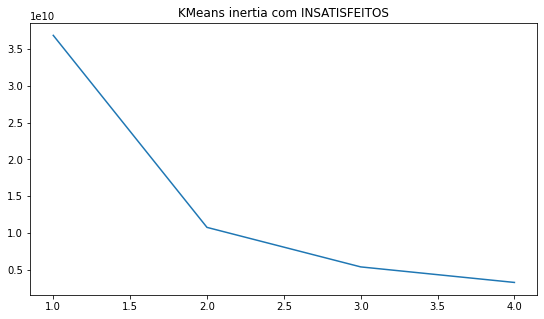

In [ ]:
# melhor valor localizado até 4 pontos...

# Realizando o corte até 5 agrupamentos para insatisfeitos

inertia =[]
for i in range (1, 5):
    km = KMeans (n_clusters=i).fit(insatisfeitos)
    inertia.append(km.inertia_)

#plot results
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(1,5), y=inertia)
plt.title('KMeans inertia com INSATISFEITOS')

plt.show()

 Monta a analise por média dos clusters

In [ ]:
# 3 cluster para satisfeitos
cluster = [3]
cluster_centers = {}

for c in cluster:
  km = KMeans (n_clusters=c).fit(satisfeitos)
  satisfeitos['cluster'] = km.labels_
  cluster_centers[str(c)] = km.cluster_centers_


In [ ]:
# 4 cluster para insatisfeitos
cluster = [4]
cluster_centers = {}

for c in cluster:
  km = KMeans (n_clusters=c).fit(insatisfeitos)
  insatisfeitos['cluster'] = km.labels_
  cluster_centers[str(c)] = km.cluster_centers_

In [ ]:
satisfeitos.groupby(['cluster']).mean()

# Pela média dos resultados notamos algumas caracteriscas que podem ser relevantes dos satisfeitos nos 3 grupos abaixo:
# O Grupo 1 aparentemente pode se considerar, wi fi, classe do voo, menor atraso
# O grupo 2 poderia considerar convenincia e serviço de voo
# O grupo 3 podemos entender por localização do embarque, distancia do voo, comida a bordo, internet, entretenimento, o atraso aparenta ser mais relevante
# A idade possui distrubuição normal média 42 anos em todos os clusters



,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiService,Departure/Arrival time convenient,EaseofOnlinebooking,GateLocation,Foodanddrink,OnlineBoarding,SeatComfort,InflightEntertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes
cluster,,,,,,,,,,,,,,,,,,,,,,
0,0.496302,0.037270,42.657465,0.960753,0.087940,1965.108223,2.995533,2.984477,3.000220,2.988651,3.560079,4.123600,4.141905,4.055503,3.973274,3.969393,4.080472,3.771399,4.064070,3.857582,12.853628,12.763564
1,0.501732,0.176037,40.322276,0.879874,0.492317,570.165867,3.386491,2.978639,3.105205,2.964828,3.475531,3.908429,3.776534,3.840616,3.716360,3.647837,3.845945,3.523581,3.862643,3.632028,12.050981,12.268230
2,0.503669,0.001261,44.007682,0.997478,0.006421,3327.680234,2.838913,2.924444,2.889246,2.993694,3.576244,4.183330,4.180922,4.145838,4.041046,4.043109,4.098487,3.763930,4.099289,3.855652,13.344187,13.358977


Text(0.5, 1.0, 'Delay in minutes vs Distancia')

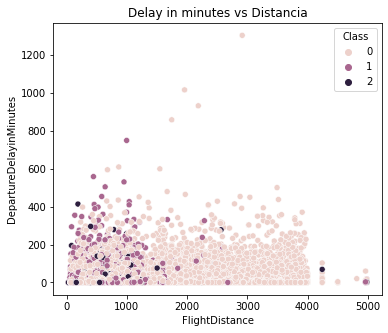

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=satisfeitos.FlightDistance, y=satisfeitos.DepartureDelayinMinutes, hue=satisfeitos.Class)
plt.title('Delay in minutes vs Distancia')

#podemos tirar algumas analises de algumas features agrupadas de satisfeitos
# podemos analisar que a maioria dos satisfeitos estão na classe executiva e o atraso não tem muita relação com a distancia do voo
# ou seja, mas que a maioria dos atrasos giram em torno de 300 a 400 minutos para os satisfeitos
# outro ponto é que a classe economico plus aparentemente parece que a companhia tem um cuidado maior em ganhar esses clientes,
# pois os pontos de satisfeitos possui atraso baixo para voos de pouca distancia




In [ ]:
clusters = [3]
cluster_centers = {}

for c in clusters:
    km = KMeans(n_clusters=c).fit(satisfeitos[['Age', 'DepartureDelayinMinutes', 'FlightDistance', 'Class']])
    satisfeitos['cluster' + str(c)] = km.labels_
    cluster_centers[str(c)] = km.cluster_centers_

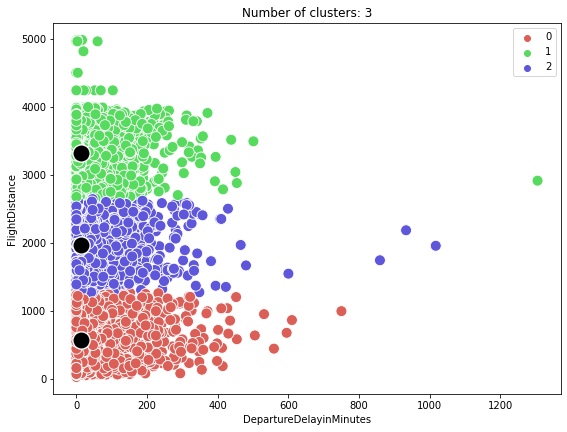

In [ ]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(satisfeitos.DepartureDelayinMinutes, satisfeitos.FlightDistance, satisfeitos['cluster' + str(c)], s=120, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,1], cluster_centers[str(c)][:,2], color='black', s=300)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()

# os atrasos estão sempre nessa mesma faixa entre 0 a 400 minutos


In [ ]:
insatisfeitos.groupby(['cluster']).mean()

# Para o grupo de instatisfeitos, podemos tirar algumsa analises das notas médias em relação aos satisfeitos
# O intretenimento de voo, serviço de bordo, limpeza estão com notas menores



,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiService,Departure/Arrival time convenient,EaseofOnlinebooking,GateLocation,Foodanddrink,OnlineBoarding,SeatComfort,InflightEntertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes
cluster,,,,,,,,,,,,,,,,,,,,,,
0,0.512487,0.112253,38.671956,0.589360,0.591831,2057.177940,2.405957,3.126691,2.711759,2.972555,2.837669,2.707466,2.972945,2.735172,2.865895,2.908169,3.136446,2.883065,3.186915,2.761186,16.749870,17.245187
1,0.513834,0.277335,37.711383,0.472120,0.922067,392.617941,2.397893,3.104074,2.492571,2.974900,2.988133,2.623988,3.048639,2.935982,3.060019,3.007933,3.443964,3.086354,3.449199,2.978476,15.744578,16.570927
2,0.503497,0.016317,41.250583,0.948329,0.071484,3328.599068,2.402098,2.958042,2.980963,3.006605,2.776224,2.906760,2.933178,2.493784,2.541181,2.648796,2.748640,2.548951,2.712898,2.524476,18.842269,20.073038
3,0.512897,0.283573,36.305974,0.471660,0.910284,1020.890485,2.399932,3.198495,2.507354,2.976694,2.985575,2.653920,3.059962,2.948637,3.084795,3.047743,3.452314,3.109854,3.470641,2.999095,17.138534,17.615907


In [ ]:
satisfeitos.groupby(['cluster']).mean()
# Comparação das médias de insatisfeitos e satisfeitos

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiService,Departure/Arrival time convenient,EaseofOnlinebooking,GateLocation,Foodanddrink,OnlineBoarding,SeatComfort,InflightEntertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,cluster3
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,0.496302,0.037270,42.657465,0.960753,0.087940,1965.108223,2.995533,2.984477,3.000220,2.988651,3.560079,4.123600,4.141905,4.055503,3.973274,3.969393,4.080472,3.771399,4.064070,3.857582,12.853628,12.763564,2.000000
1,0.501732,0.176037,40.322276,0.879874,0.492317,570.165867,3.386491,2.978639,3.105205,2.964828,3.475531,3.908429,3.776534,3.840616,3.716360,3.647837,3.845945,3.523581,3.862643,3.632028,12.050981,12.268230,0.000000
2,0.503669,0.001261,44.007682,0.997478,0.006421,3327.680234,2.838913,2.924444,2.889246,2.993694,3.576244,4.183330,4.180922,4.145838,4.041046,4.043109,4.098487,3.763930,4.099289,3.855652,13.344187,13.358977,1.000688


Text(0.5, 1.0, 'Delay in minutes vs Distancia')

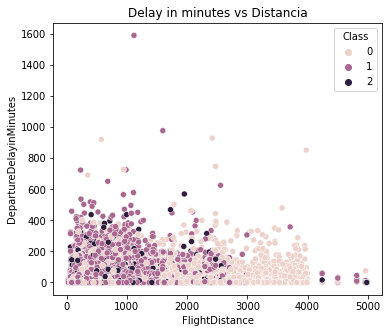

In [ ]:
# Podemos ver abaixo que os instatisfeitos são mais predominados da classe economica, diferente dos satisfeitos na analise anterior
# Os atrasos superam os 400 minutos chegando a 600 para essa classe, o que pode ser de relevancia para esse agrupamento
# a distancia do voo aparentemente não parece um problema, pois é bem similar aos satisfeitos, o que mostra que o serviço pode estar sendo ok.
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=insatisfeitos.FlightDistance, y=insatisfeitos.DepartureDelayinMinutes, hue=insatisfeitos.Class)
plt.title('Delay in minutes vs Distancia')

In [ ]:
clusters = [4]
cluster_centers = {}

for c in clusters:
    km = KMeans(n_clusters=c).fit(insatisfeitos[['Age', 'DepartureDelayinMinutes', 'FlightDistance', 'Class']])
    insatisfeitos['cluster' + str(c)] = km.labels_
    cluster_centers[str(c)] = km.cluster_centers_

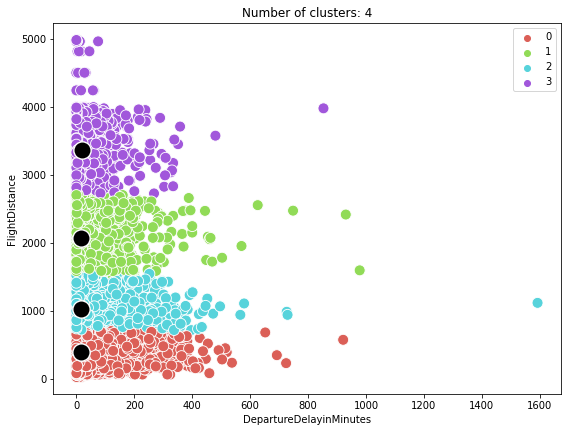

In [ ]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(insatisfeitos.DepartureDelayinMinutes, insatisfeitos.FlightDistance, insatisfeitos['cluster' + str(c)], s=120, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,1], cluster_centers[str(c)][:,2], color='black', s=300)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()